In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset.csv')


In [3]:
df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df['Cuisines']=df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [26]:
# columns of interest are 'Restaurant Name' 'Aggregate rating', 'Rating color', 'Rating text','Votes'
ratings=df['Rating text'].value_counts()
rating_words=ratings.index
# for i in range( len(nn)):
#    print(nn[i])

Index(['Average', 'Not rated', 'Good', 'Very Good', 'Excellent', 'Poor'], dtype='object', name='Rating text')

In [28]:
pip install TextBlob



     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------- -------------------- 20.5/41.5 kB ? eta -:--:--
     -------------------------------------  41.0/41.5 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 505.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s et


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# Task 3 Resturant review
from textblob import TextBlob

In [32]:
# Identify the good words and the bad words in the review
positve_words=[]
negative_words=[]
neutral_words=[]
rating_words=ratings.index
for i in range( len(rating_words)):
   blob = TextBlob(rating_words[i])
   sentiment = blob.sentiment.polarity
   if sentiment > 0:
     positve_words.append(rating_words[i])  
   elif sentiment < 0:
     negative_words.append(rating_words[i])  
   else:
     neutral_words.append(rating_words[i])  


In [33]:
print(positve_words,negative_words,neutral_words)

['Good', 'Very Good', 'Excellent'] ['Average', 'Poor'] ['Not rated']


In [44]:
# 'Aggregate rating', 'Rating text'
df['rating_text_lenght']=df['Rating text'].apply(lambda x: len(x))
df['rating_text_lenght']

0       9
1       9
2       9
3       9
4       9
       ..
9546    9
9547    9
9548    4
9549    9
9550    9
Name: rating_text_lenght, Length: 9551, dtype: int64

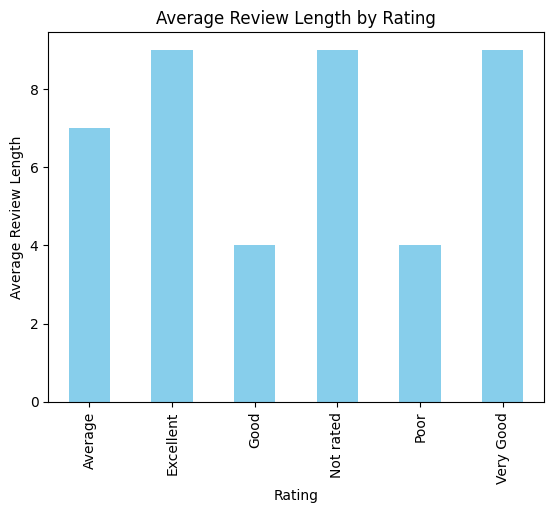

In [51]:
avg_review_length = df.groupby('Rating text')['rating_text_lenght'].mean()

# Create the bar chart
avg_review_length.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.title('Average Review Length by Rating')

# Show the chart
plt.show()

In [74]:
# Task2 Votes Analysis
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'rating_text_lenght'],
      dtype='object')

In [96]:
# Votes and the resturant name
df_votes=df[['Votes','Restaurant Name']].sort_values(by='Votes', ascending=False)
df_votes

,Votes,Restaurant Name
728,10934,Toit
735,9667,Truffles
3994,7931,Hauz Khas Social
2412,7574,Peter Cat
739,6907,AB's - Absolute Barbecues
...,...,...
5732,0,Daily Belly
5733,0,Deep Bakery And Cake
5734,0,Dhaba NH10
5735,0,Dilkhush Dhaba


In [113]:
# Votes and the Average rating
df_analysis = df[['Votes','Aggregate rating']]
df_analysis

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


In [114]:
corr=df_analysis['Votes'].corr(df_analysis["Aggregate rating"])
corr

np.float64(0.31369058419541146)

In [120]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 819.2 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


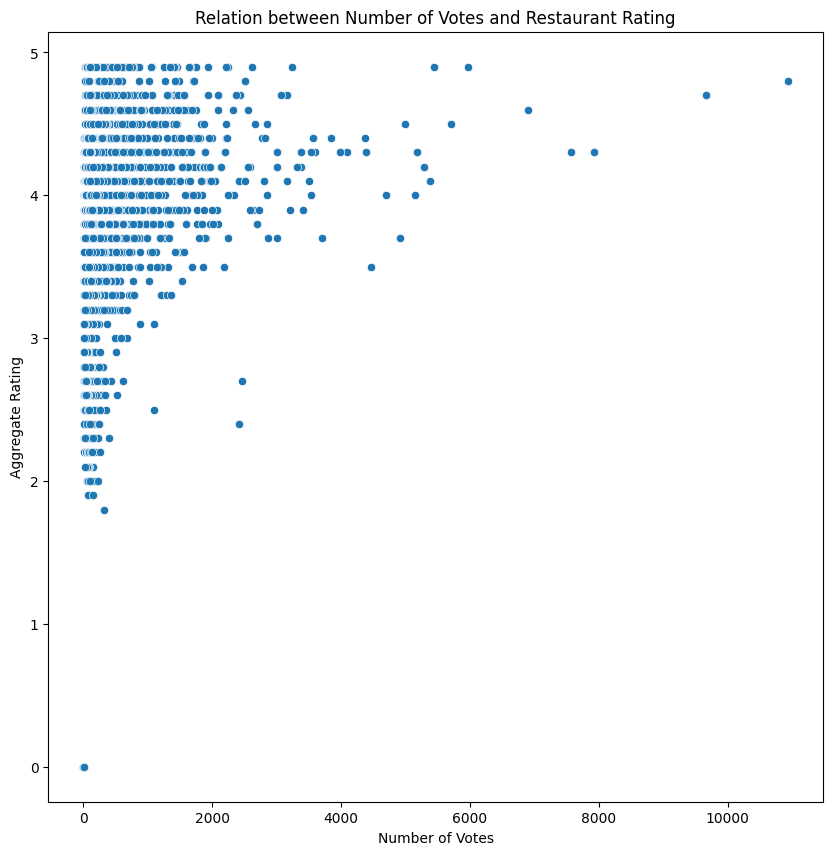

In [122]:

plt.figure(figsize=(10,10))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df_analysis)
plt.title('Relation between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

In [125]:
# Task3 Price Range and Online Deleviry and Table Booking
df_analysis=df[['Price range','Has Online delivery','Has Table booking']].copy()
df_analysis['Has Online delivery']=df_analysis['Has Online delivery'].map({'Yes':True,'No':False})
df_analysis['Has table booking']=df_analysis['Has Table booking'].map({'Yes':True,'No':False})

In [129]:
summary_table=pd.pivot_table(df_analysis,index='Price range',values=['Has Online delivery','Has table booking'],aggfunc=sum)
print('Summary Table:')
summary_table

Summary Table:


C:\Users\mohme\AppData\Local\Temp\ipykernel_17676\3191789669.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary_table=pd.pivot_table(df_analysis,index='Price range',values=['Has Online delivery','Has table booking'],aggfunc=sum)


,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


<Figure size 1000x800 with 0 Axes>

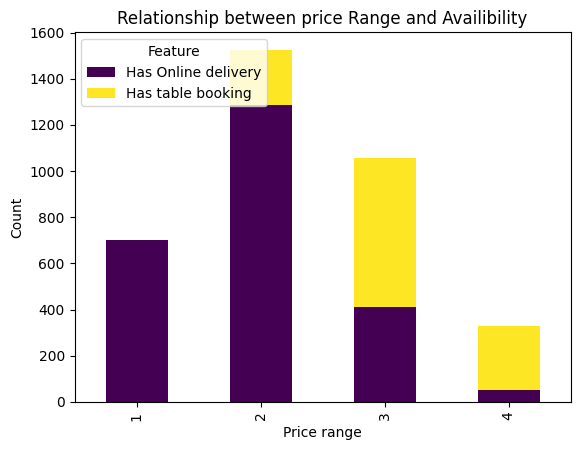

In [130]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper left')
plt.show()

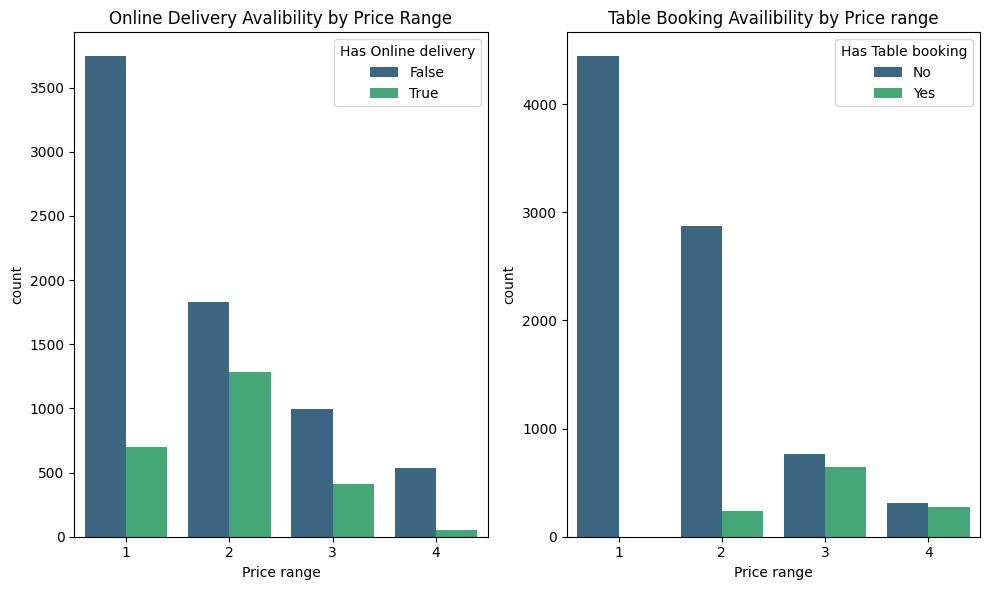

In [132]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

sns.countplot(x='Price range' , hue='Has Online delivery' , data=df_analysis,palette='viridis')
plt.title('Online Delivery Avalibility by Price Range')

plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking', data=df_analysis,palette='viridis')
plt.title('Table Booking Availibility by Price range')

plt.tight_layout()
plt.show()